In [35]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 随机种子，确保每次运行结果一致
torch.manual_seed(55)

# 生成训练数据
X = torch.randn(100, 2)  # 100 个样本，每个样本 2 个特征
true_w = torch.tensor([2.0, 3.0])  # 假设真实权重
true_b = 4.0  # 偏置项
Y = X @ true_w + true_b + torch.randn(100) * 0.1  # 加入一些噪声

# 打印部分数据
print(X[:5])
print(Y[:5])

tensor([[ 1.8616,  0.9035],
        [ 1.3395,  1.2005],
        [ 1.0070,  0.2379],
        [-0.4197,  0.5358],
        [-0.3831,  2.1767]])
tensor([10.4177, 10.3838,  6.7521,  4.8077,  9.6428])


In [37]:
import torch.nn as nn

# 定义线性回归模型
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # 定义一个线性层，输入为2个特征，输出为1个预测值
        self.linear = nn.Linear(2, 1)  # 输入维度2，输出维度1
    
    def forward(self, x):
        return self.linear(x)  # 前向传播，返回预测结果

# 创建模型实例
model = LinearRegressionModel()

In [39]:
# 损失函数（均方误差）
criterion = nn.MSELoss()

# 优化器（使用 SGD 或 Adam）
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 学习率设置为0.01

In [41]:
# 训练模型
num_epochs = 1000  # 训练 1000 轮
for epoch in range(num_epochs):
    model.train()  # 设置模型为训练模式

    # 前向传播
    predictions = model(X)  # 模型输出预测值
    loss = criterion(predictions.squeeze(), Y)  # 计算损失（注意预测值需要压缩为1D）

    # 反向传播
    optimizer.zero_grad()  # 清空之前的梯度
    loss.backward()  # 计算梯度
    optimizer.step()  # 更新模型参数

    # 打印损失
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/1000], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.4216
Epoch [200/1000], Loss: 0.0136
Epoch [300/1000], Loss: 0.0076
Epoch [400/1000], Loss: 0.0075
Epoch [500/1000], Loss: 0.0075
Epoch [600/1000], Loss: 0.0075
Epoch [700/1000], Loss: 0.0075
Epoch [800/1000], Loss: 0.0075
Epoch [900/1000], Loss: 0.0075
Epoch [1000/1000], Loss: 0.0075


Predicted weight: [[1.9974107 3.0209405]]
Predicted bias: [4.005405]


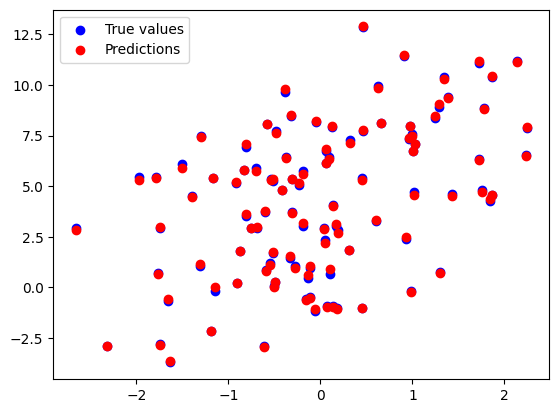

In [43]:
# 查看训练后的权重和偏置
print(f'Predicted weight: {model.linear.weight.data.numpy()}')
print(f'Predicted bias: {model.linear.bias.data.numpy()}')

# 在新数据上做预测
with torch.no_grad():  # 评估时不需要计算梯度
    predictions = model(X)

# 可视化预测与实际值
plt.scatter(X[:, 0], Y, color='blue', label='True values')
plt.scatter(X[:, 0], predictions, color='red', label='Predictions')
plt.legend()
plt.show()